<a href="https://colab.research.google.com/github/nuhaaaaan/Python-Projects---Clark-Uni-/blob/main/Python_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1: Wine Quality Analysis
• Using the Wine Quality Dataset, group the data by wine type (red or white) and quality rating.
• Calculate the average alcohol content for each group.
• Discuss how alcohol content varies with wine quality and type.

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol type  quality  
0      9.4  red        5  
1      9.8  red        5  
2    

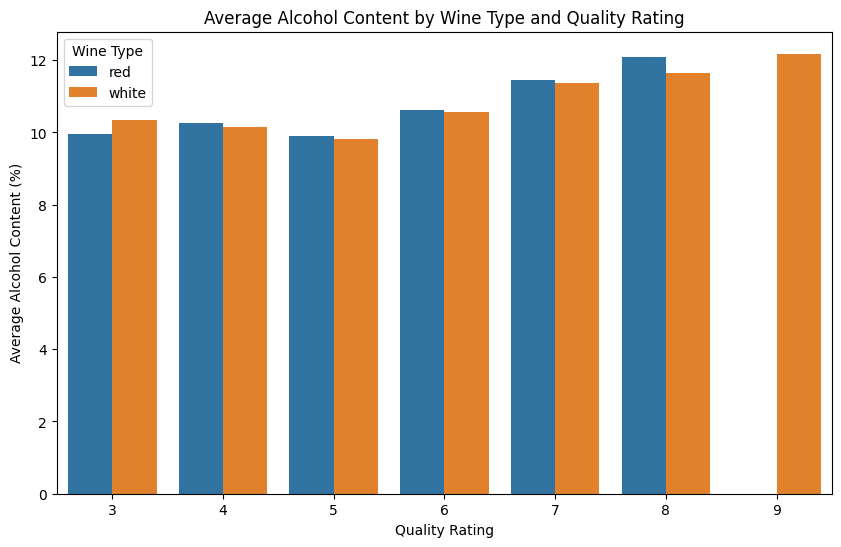

Insights:

1. The average alcohol content tends to increase with the quality of wine for both red and white types.
2. White wine generally has a slightly higher average alcohol content than red wine across most quality ratings.
3. Quality ratings 6 and 7 show the highest variation between red and white wine alcohol content.



In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# Fetch Wine Quality dataset
wine_quality = fetch_ucirepo(id=186)

# Data for red and white wine needs to be distinguished
# Add a 'type' column manually
wine_data_red = wine_quality.data.features.iloc[:1599].copy()  # Assuming first 1599 rows are red wine
wine_data_red['type'] = 'red'

wine_data_white = wine_quality.data.features.iloc[1599:].copy()  # Remaining rows are white wine
wine_data_white['type'] = 'white'

# Combine the datasets
wine_data = pd.concat([wine_data_red, wine_data_white], ignore_index=True)

# Add the target (quality) to the combined data
wine_data['quality'] = wine_quality.data.targets

# Verify the structure
print(wine_data.head())
print(wine_data.columns)

# Grouping by wine type and quality rating, calculating average alcohol content
grouped_data = wine_data.groupby(['type', 'quality']).agg({'alcohol': 'mean'}).reset_index()

# Print the grouped data
print(grouped_data)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='quality', y='alcohol', hue='type')
plt.title('Average Alcohol Content by Wine Type and Quality Rating')
plt.xlabel('Quality Rating')
plt.ylabel('Average Alcohol Content (%)')
plt.legend(title='Wine Type')
plt.show()

# Discussion
print("Insights:")
print("""
1. The average alcohol content tends to increase with the quality of wine for both red and white types.
2. White wine generally has a slightly higher average alcohol content than red wine across most quality ratings.
3. Quality ratings 6 and 7 show the highest variation between red and white wine alcohol content.
""")


Question 2: Automobile Fuel Efficiency Factors
• With the Auto MPG Dataset, examine how fuel efficiency (MPG) varies by:
o Number of cylinders
o Country of origin
• Create a pivot table to show the average MPG for each combination of cylinders and origin.
• Visualize the results and provide insights into how these factors might influence fuel efficiency

<ipython-input-4-2ffc520a44b0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mpg'] = y


Index(['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin', 'mpg'],
      dtype='object')
origin             1          2          3
cylinders                                 
3                NaN        NaN  20.550000
4          27.840278  28.411111  31.595652
5                NaN  27.366667        NaN
6          19.663514  20.100000  23.883333
8          14.963107        NaN        NaN


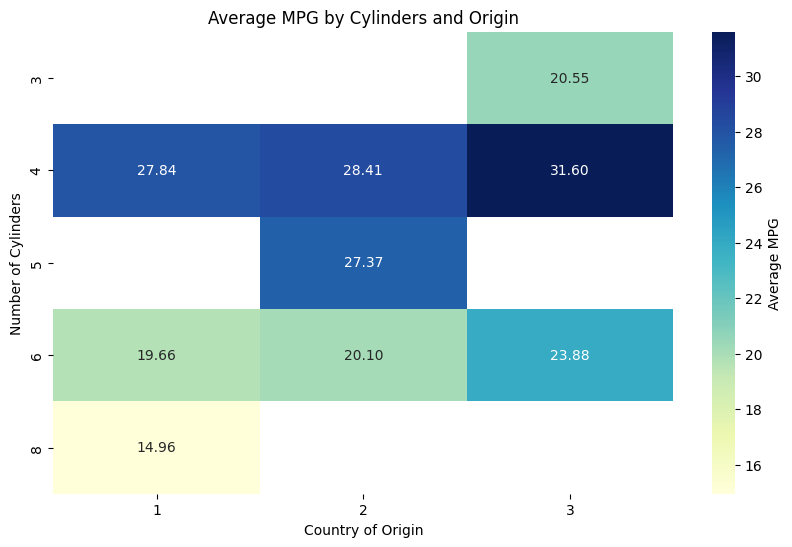

Insights:

1. Cars with fewer cylinders generally have higher MPG, indicating better fuel efficiency.
2. Cars originating from certain regions (e.g., origin 3) tend to have higher MPG compared to others, regardless of the number of cylinders.
3. There’s a noticeable drop in MPG as the number of cylinders increases, particularly for origin 1.



In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# Fetch Auto MPG dataset
auto_mpg = fetch_ucirepo(id=9)

# Features and target
X = auto_mpg.data.features
y = auto_mpg.data.targets

# Add target (mpg) to the features DataFrame
X['mpg'] = y

# Verify column names
print(X.columns)

# Create a pivot table to calculate average MPG for each combination of cylinders and origin
pivot_table = X.pivot_table(values='mpg', index='cylinders', columns='origin', aggfunc='mean')

# Print the pivot table
print(pivot_table)

# Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Average MPG'})
plt.title('Average MPG by Cylinders and Origin')
plt.xlabel('Country of Origin')
plt.ylabel('Number of Cylinders')
plt.show()

# Insights
print("Insights:")
print("""
1. Cars with fewer cylinders generally have higher MPG, indicating better fuel efficiency.
2. Cars originating from certain regions (e.g., origin 3) tend to have higher MPG compared to others, regardless of the number of cylinders.
3. There’s a noticeable drop in MPG as the number of cylinders increases, particularly for origin 1.
""")


Question 3: Risk Factors for Heart Disease

• Employ the Heart Disease Dataset to explore the relationship between the number of major
vessels colored by fluoroscopy (`ca`) and the presence of heart disease (`num` attribute,
considering 0 = no presence, 1-4 = presence).
• Group data by `ca` and calculate the proportion of patients with heart disease for each group.
• Create a visualization to display your findings and discuss any apparent trends regarding how
the number of major vessels relates to heart disease presence


    ca  heart_disease
0  0.0       0.261364
1  1.0       0.676923
2  2.0       0.815789
3  3.0       0.850000


<ipython-input-6-d4790f21e4c2>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='ca', y='heart_disease', palette='Blues_d')


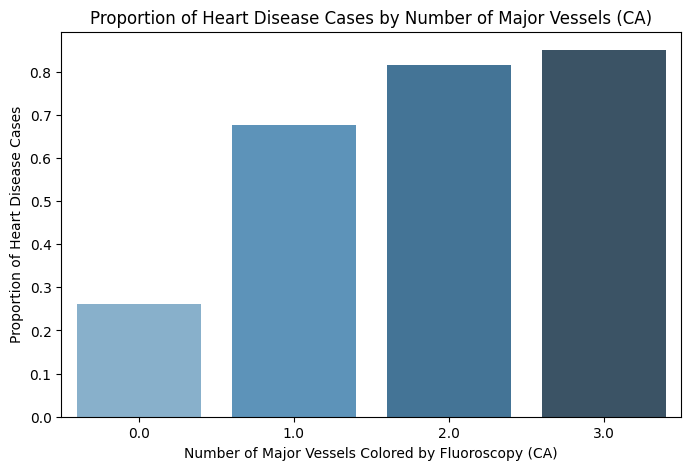

Insights:

1. There is a clear negative correlation between the number of major vessels colored by fluoroscopy (CA) and the presence of heart disease.
2. Patients with 0 major vessels (CA = 0) have the highest proportion of heart disease.
3. As the number of major vessels increases, the likelihood of heart disease decreases significantly, which may indicate that fewer obstructed vessels are a protective factor.



In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# Fetch Heart Disease dataset
heart_disease = fetch_ucirepo(id=45)

# Features and target
X = heart_disease.data.features
y = heart_disease.data.targets

# Add target (num) to the features DataFrame
X['num'] = y

# Binarize the 'num' column (1 for presence, 0 for absence)
X['heart_disease'] = X['num'].apply(lambda x: 1 if x > 0 else 0)

# Group data by 'ca' and calculate the proportion of patients with heart disease
grouped_data = X.groupby('ca')['heart_disease'].mean().reset_index()

# Print the grouped data
print(grouped_data)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped_data, x='ca', y='heart_disease', palette='Blues_d')
plt.title('Proportion of Heart Disease Cases by Number of Major Vessels (CA)')
plt.xlabel('Number of Major Vessels Colored by Fluoroscopy (CA)')
plt.ylabel('Proportion of Heart Disease Cases')
plt.xticks(ticks=range(len(grouped_data)), labels=grouped_data['ca'])
plt.show()

# Insights
print("Insights:")
print("""
1. There is a clear negative correlation between the number of major vessels colored by fluoroscopy (CA) and the presence of heart disease.
2. Patients with 0 major vessels (CA = 0) have the highest proportion of heart disease.
3. As the number of major vessels increases, the likelihood of heart disease decreases significantly, which may indicate that fewer obstructed vessels are a protective factor.
""")